## EDA Case Study - Lending Club Case Study

## Business Understanding

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

When a person applies for a loan, there are two types of decisions that could be taken by the company:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)

Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

## Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

## Data Provided

1. Loan Data Set - Contains Loan data for for all loans issued through the time period 2007 t0 2011.
2. Data Dictionary - Description of the fields in the loan data sheet.

In [1]:
# Import statements
import pandas as pd
import numpy as np

<b>Loading the dataframe</b>

In [2]:
loan_master = pd.read_csv('C:\python_project_files\loan.csv',sep=',',low_memory=False)

In [3]:
loan_master.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
loan_master.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [6]:
loan_master.shape

(39717, 111)

In [7]:
loan_master.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

<b>Cleanig the dataframe</b>

<b>Drop rows and columns from the dataframe which are entirely having missing values, if any</b>

In [8]:
loan_master = loan_master.dropna(axis =1, how='all')

In [9]:
loan_master = loan_master.dropna(axis=0, how ='all')

In [10]:
loan_master.shape

(39717, 57)

In [11]:
loan_master.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [12]:
loan_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

Let's examin further for missing values.

In [13]:
missing = round(100*(loan_master.isnull().sum()/len(loan_master.id)), 2)
missing[missing != 0]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

<b>Removing columns with very low percentage of data</b>
<b>mths_since_last_record and next_pymnt_d have more than 90% of NaN which makes them a good candidate to be removed as these values cannot be manufactured<b>

In [14]:
loan_master = loan_master.drop(["mths_since_last_record","next_pymnt_d"], axis=1)

<b>Remove unimportant columns : Looking at the columns left in the dataframe after the initial cleaning, the below 3 columns deosn't bear any relevance, hence can be dropped from the dataframe - 1. desc: Description/Text input from the borrower during loan application. 2. Title: Redundant column, same as purpose. 3. mths_since_last_delinq: This field will not be available for a borrower at the time of loan application</b>

In [15]:
# dropping the columns
#loan_master = loan_master.drop(['desc', 'title' 'mths_since_last_delinq'])
loan_master = loan_master.drop(["desc", "title","mths_since_last_delinq","zip_code","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt"], axis=1)

<b>Lets look at all the columns in the dataframe and try to see which columns have same values across or just 1 or 2 unique values 0 and Nan<b>

In [16]:
loan_master.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_bal                   

In [17]:
# Show the unique values of the column from above who has only 1 or 2 unique value across.
loan_master.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [18]:
loan_master.pymnt_plan.unique()

array(['n'], dtype=object)

In [19]:
loan_master.initial_list_status.unique()

array(['f'], dtype=object)

In [20]:
loan_master.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [21]:
loan_master.policy_code.unique()

array([1], dtype=int64)

In [22]:
loan_master.application_type.unique()

array(['INDIVIDUAL'], dtype=object)

In [23]:
loan_master.acc_now_delinq .unique()

array([0], dtype=int64)

In [24]:
loan_master.chargeoff_within_12_mths .unique()

array([ 0., nan])

In [25]:
loan_master.delinq_amnt .unique()

array([0], dtype=int64)

In [26]:
loan_master.tax_liens .unique()

array([ 0., nan])

<b>From the above its evident that apart from the 'term' field all other fiels contains only a single value which is not valuable or analysis, So dropping those columns</b>

In [27]:
loan_master = loan_master.drop(['pymnt_plan','initial_list_status','collections_12_mths_ex_med','policy_code','application_type',
'acc_now_delinq','chargeoff_within_12_mths','delinq_amnt','tax_liens'],axis=1)

<b>Also columns 'id', 'member_id' and 'url' have all unique values across all rows which is not useful for analysis, dropping those columns</b>

In [28]:
loan_master = loan_master.drop(['id', 'member_id', 'url'], axis=1)

In [29]:
#Dropping columns funded_amt and funded_amt_inv as its very close to the value of loan_amnt and analysis on one of them should be good
loan_master = loan_master.drop(['funded_amnt', 'funded_amnt_inv'], axis=1)

In [30]:
loan_master.shape

(39717, 26)

In [31]:
missing = round(100*(loan_master.isnull().sum()/len(loan_master.loan_amnt)), 2)
missing[missing != 0]

emp_title               6.19
emp_length              2.71
revol_util              0.13
last_credit_pull_d      0.01
pub_rec_bankruptcies    1.75
dtype: float64

<b>From the above the column with most missing values is 'emp_title' which gives the job title, we can impute it with'Not Provided' and do a study on its effect of loan default but for this we will remove the rows with missing values<b>

In [32]:
loan_master = loan_master[~loan_master.emp_title.isnull()]

<b>Also the other columns have very significantly less data compared to the total data volume, we remove the missing rows for those columns as well</b>

In [33]:
loan_master = loan_master[~loan_master.revol_util.isnull()]

In [34]:
loan_master = loan_master[~loan_master.emp_length.isnull()]

In [35]:
loan_master = loan_master[~loan_master.last_credit_pull_d.isnull()]

In [36]:
loan_master = loan_master[~loan_master.pub_rec_bankruptcies.isnull()]

In [37]:
#No more rows with missing date, we now have relevent data in all the rows of all the columns
missing = round(100*(loan_master.isnull().sum()/len(loan_master.loan_amnt)), 2)
missing[missing != 0]

Series([], dtype: float64)

In [38]:
loan_master.shape

(36502, 26)

In [39]:
loan_master.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies
1,2500,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,0,Apr-99,5,3,0,1687,9.40%,4,Sep-13,0.0
3,10000,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,0,Feb-96,1,10,0,5598,21%,37,Apr-16,0.0
4,3000,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,...,0,Jan-96,0,15,0,27783,53.90%,38,May-16,0.0
5,5000,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,0,Nov-04,3,9,0,7963,28.30%,12,Jan-16,0.0
6,7000,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,...,0,Jul-05,1,7,0,17726,85.60%,11,May-16,0.0






















<b>Rounding of amount columns below to two decimal places for ease of calculation<b>
1. last_pymnt_amnt
2. collection_recovery_fee
3. recoveries
4. total_rec_late_fee
5. total_rec_int
6. total_rec_prncp
7. total_pymnt_inv
8. total_pymnt
9. out_prncp_inv
10. out_prncp

In [40]:
loan_master.annual_inc = loan_master.annual_inc.round()

<b>Changing the below columns from object type to date time column</b>

In [41]:
loan_master.issue_d = pd.to_datetime(loan_master.issue_d, format='%b-%y')
loan_master.earliest_cr_line = pd.to_datetime(loan_master.earliest_cr_line, format='%b-%y')
loan_master.last_credit_pull_d = pd.to_datetime(loan_master.last_credit_pull_d, format='%b-%y')

<b>Strip below columns of the % symbol for better calculations<b>

In [42]:
loan_master.revol_util = loan_master.revol_util.str.strip('%')
loan_master.int_rate = loan_master.int_rate.str.strip('%')

In [43]:
# Extract the number of years from employee_length

# Extract number of the years
emp_length_dict = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [44]:
loan_master = loan_master.replace({"emp_length": emp_length_dict })

In [45]:
#Repeating similar action on term column

# Extract number of the years
import re
loan_master['term'] = loan_master['term'].apply(lambda x: re.findall('\d+', str(x))[0])
loan_master['term'] = loan_master['term'].apply(lambda x: pd.to_numeric(x))

In [46]:
#Derived column - Ratio of loan_amnt to annual_inc
loan_master['loan_amnt/annual_income'] = (loan_master['loan_amnt']/loan_master['annual_inc']).round(2)

In [47]:
# As we are only concerned with the loans which are Fully Faid vs Charges off we can safely discard the Current loans
loan_master = loan_master.set_index("loan_status")
loan_master = loan_master.drop("Current", axis=0)
loan_master = loan_master.reset_index("loan_status")

In [48]:
loan_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35436 entries, 0 to 35435
Data columns (total 27 columns):
loan_status                35436 non-null object
loan_amnt                  35436 non-null int64
term                       35436 non-null int64
int_rate                   35436 non-null object
installment                35436 non-null float64
grade                      35436 non-null object
sub_grade                  35436 non-null object
emp_title                  35436 non-null object
emp_length                 35436 non-null int64
home_ownership             35436 non-null object
annual_inc                 35436 non-null float64
verification_status        35436 non-null object
issue_d                    35436 non-null datetime64[ns]
purpose                    35436 non-null object
addr_state                 35436 non-null object
dti                        35436 non-null float64
delinq_2yrs                35436 non-null int64
earliest_cr_line           35436 non-null datetime6

In [49]:
#For Employee Length, lets standerdise the values
loan_master.emp_length.value_counts()

10    8037
2     4089
0     3986
3     3840
4     3214
5     3054
1     2969
6     2064
7     1639
8     1364
9     1180
Name: emp_length, dtype: int64

In [50]:
#Field 'earliest_cr_line' have values in future which might have happened due to having only last two values of year field
loan_master['earliest_cr_line_month'] = loan_master['earliest_cr_line'].dt.month
loan_master['earliest_cr_line_year'] = loan_master['earliest_cr_line'].dt.year

In [51]:
loan_master[loan_master['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

In [52]:
#Substracting 100 from the above year will give us the correct values
for i in loan_master['earliest_cr_line_year']:
    if i in [2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054]:
        loan_master['earliest_cr_line_year'] = loan_master['earliest_cr_line_year'] -100

In [53]:
loan_master[loan_master['earliest_cr_line_year'] < 2011 ]['earliest_cr_line_year'].unique()

array([1899, 1896, 1904, 1905, 1907, 1898, 1889, 1903, 1891, 1893, 1901,
       1897, 1883, 1885, 1902, 1884, 1906, 1881, 1900, 1894, 1895, 1892,
       1886, 1890, 1888, 1880, 1908, 1879, 1887, 1878, 1871, 1872, 1870,
       1869, 1875, 1876, 1877, 1882, 1968, 1874, 1967, 1965, 1873, 1963,
       1966, 1962, 1956, 1946, 1950, 1964, 1954], dtype=int64)

In [54]:
# Splitting the issue_date column by month and year
loan_master['issue_d_month'] = loan_master['issue_d'].dt.month
loan_master['issue_d_year'] = loan_master['issue_d'].dt.year

In [55]:
#Since we have now earliest_cr_line_year, earliest_cr_line_month, issue_d_year and issue_d_month, 
#we can drop the original date columns since those won't be required anymore - earliest_cr_line and issue_d
loan_master = loan_master.drop(["earliest_cr_line", "issue_d"], axis=1)

In [56]:
loan_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35436 entries, 0 to 35435
Data columns (total 29 columns):
loan_status                35436 non-null object
loan_amnt                  35436 non-null int64
term                       35436 non-null int64
int_rate                   35436 non-null object
installment                35436 non-null float64
grade                      35436 non-null object
sub_grade                  35436 non-null object
emp_title                  35436 non-null object
emp_length                 35436 non-null int64
home_ownership             35436 non-null object
annual_inc                 35436 non-null float64
verification_status        35436 non-null object
purpose                    35436 non-null object
addr_state                 35436 non-null object
dti                        35436 non-null float64
delinq_2yrs                35436 non-null int64
inq_last_6mths             35436 non-null int64
open_acc                   35436 non-null int64
pub_rec     

# Data Analysis

We will now start with data analysis. The objective of the analysis is to identify the variables that will help predict default applicants. We can use those variables to approve or reject a loan.
There are 3 types of variables - 1. Loan characteristics variables 2. Applicant characteristics variables and 3. Applicant behavioral variables

Out of these 3 types, the application behaviour variables will hold importance once the application is approved. Those will not help us in predicting whether the applicant will default or not. So, it is safe to determine such variables and drop off the analysis.

<b>Dropping variables related to applicant's behavior</b>

In [57]:
#Some of the variables were already dropped as part of data cleaning. Remaining identifiable behavioral variables can be dropped now
loan_master = loan_master.drop(["delinq_2yrs", "last_credit_pull_d", "revol_bal"], axis=1)

In [58]:
loan_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35436 entries, 0 to 35435
Data columns (total 26 columns):
loan_status                35436 non-null object
loan_amnt                  35436 non-null int64
term                       35436 non-null int64
int_rate                   35436 non-null object
installment                35436 non-null float64
grade                      35436 non-null object
sub_grade                  35436 non-null object
emp_title                  35436 non-null object
emp_length                 35436 non-null int64
home_ownership             35436 non-null object
annual_inc                 35436 non-null float64
verification_status        35436 non-null object
purpose                    35436 non-null object
addr_state                 35436 non-null object
dti                        35436 non-null float64
inq_last_6mths             35436 non-null int64
open_acc                   35436 non-null int64
pub_rec                    35436 non-null int64
revol_util  

In [59]:
#loan_status: Status of the loan, this is the most important field against which we will run the analysis
#Converting this field to a boolean will help us further in the analysis. We can run mathematical operations on this field

#Assigning value 1 if paid else 0 if the applicant has defaulted
loan_master['loan_status'] = loan_master['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

#Data type changed to integer type
loan_master['loan_status'] = loan_master['loan_status'].apply(lambda x: pd.to_numeric(x))

In [60]:
loan_master.head()

,loan_status,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,open_acc,pub_rec,revol_util,total_acc,pub_rec_bankruptcies,loan_amnt/annual_income,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
0,1,2500,60,15.27,59.83,C,C4,Ryder,0,RENT,...,3,0,9.40,4,0.0,0.08,4,1899,12,2011
1,0,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,...,10,0,21,37,0.0,0.20,2,1896,12,2011
2,0,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,...,9,0,28.30,12,0.0,0.14,11,1904,12,2011
3,0,7000,60,15.96,170.08,C,C5,Southern Star Photography,8,RENT,...,7,0,85.60,11,0.0,0.15,7,1905,12,2011
4,0,3000,36,18.64,109.43,E,E1,MKC Accounting,9,RENT,...,4,0,87.50,4,0.0,0.06,1,1907,12,2011


In [61]:
#Count of loan_status
loan_master['loan_status'].value_counts()

0    30432
1     5004
Name: loan_status, dtype: int64

In [62]:
## Wonderful solution to show labels in bar plots - copied from https://stackoverflow.com/a/48372659 and edited
def showLabels(ax, d=None):
    plt.margins(0.2, 0.2)
    rects = ax.patches
    i = 0
    locs, labels = plt.xticks() 
    counts = {}
    if not d is None:
        for key, value in d.items():
            counts[str(key)] = value

    # For each bar: Place a label
    for rect in rects:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        if d is None:
            label = "{:.1f}".format(y_value)
        else:
            try:
                label = "{:.1f}".format(y_value) + "\nof " + str(counts[str(labels[i].get_text())])
            except:
                label = "{:.1f}".format(y_value)
        
        i = i+1

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                        # positive and negative values.

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,7))
ax = loan_master.groupby('loan_status').loan_amnt.count().plot.bar()
showLabels(ax)
plt.show()

<Figure size 500x700 with 1 Axes>

## Univariate Analysis

Lets now proceed with the analysis by plotting graphs with the relevant variables

In [64]:
#Import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
#Since we are bound to create a lot of barplot during univariate analysis, creating a function and using it makes sense
def barplot_func(var):
    sns.barplot(x=var, y='loan_status', data=loan_master)
    plt.show()

<b>Plot#1: "Term" against loan_status</b>

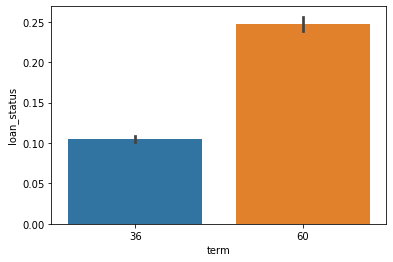

In [66]:
#Calling the function by passing the parameter "term"
barplot_func('term')

In [67]:
#mean default rate
round(np.mean(loan_master['loan_status']), 2)

0.14

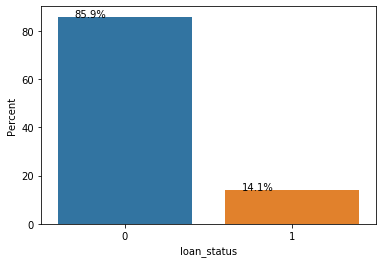

In [68]:
#sns.barplot(x='loan_status', y='loan_status',data=loan_master)
#sns.countplot(x='loan_status',data=loan_master)
#loan_master.boxplot(column=['loan_status'], return_type='axes')
#plt.show
ax = sns.barplot(x="loan_status", y="loan_status", data=loan_master, estimator=lambda x: len(x) / len(loan_master) * 100)
ax.set(ylabel="Percent")
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()))

<b>Plot#1: Conclusion</b>

We see from the above plot that applicants having loan of term 60months tend to default more than those of 36months
In fact, the default rate for loans of term 36months is less than the mean default rate whereas the default rate of loan of 60months is much much higher than the mean default rate

<b>Plot#2: "Verification_Status" against loan_status</b>

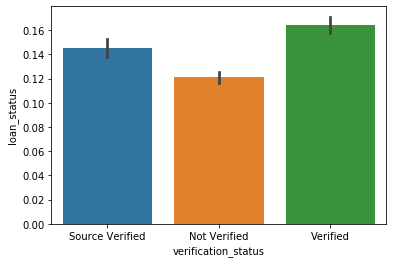

In [69]:
#Calling the function by passing the parameter "verification_status"
barplot_func('verification_status')

<b>Plot#2: Conclusion</b>

We see from the above plot that loans taken by applicants whose income was verified by LC has a higher default rate than the ones whose income was not verified.
Default rate of income not verified applicants is lower than mean default rate whereas the same for verified income applicants is higher than the mean rate

<b>Plot#3: "Purpose" against loan_status</b>

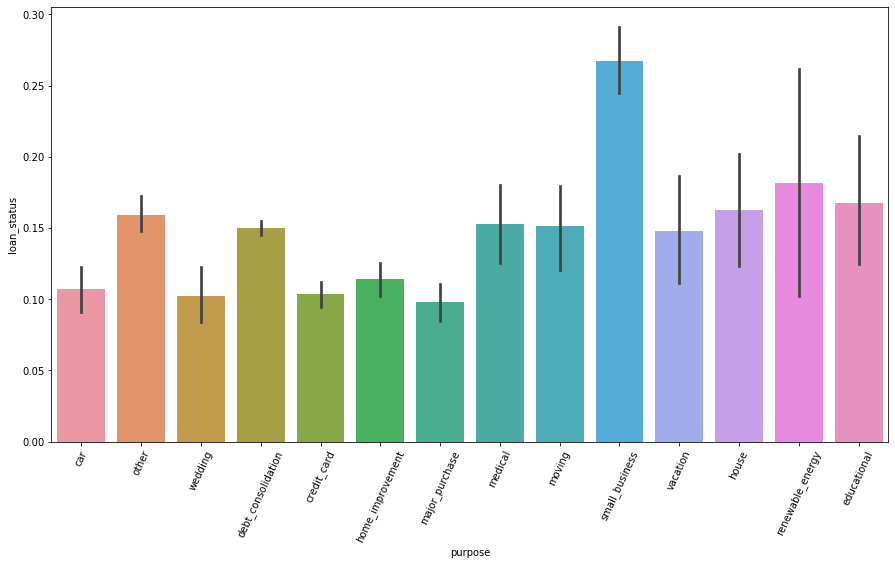

In [70]:
#Calling the function by passing the parameter "purpose"
plt.figure(figsize=(15,8))
plt.xticks(rotation=65)
purposeplot = barplot_func('purpose')

<b>Plot#3: Conclusion</b>

Here we see loan taken for small_business will likely to default while loan taken for major_purchase has least chance of getting defaulted

<b>Plot#4: "emp_length" against loan_status</b>

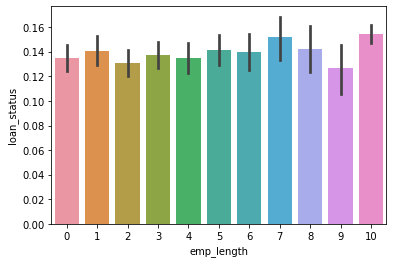

In [71]:
#Calling the function by passing the parameter "emp_length"
barplot_func('emp_length')

<b>Plot#4: Conclusion</b>

From the above plot we can infer that applicants having work experience of 10 years have a default ratio more than the mean default ratio, applicants with work experience between 3 to 6 years have almost the same default ratio around 14% which is equal to the mean default ratio

<b>Plot#5: "Year of loan issue" against loan_status</b>

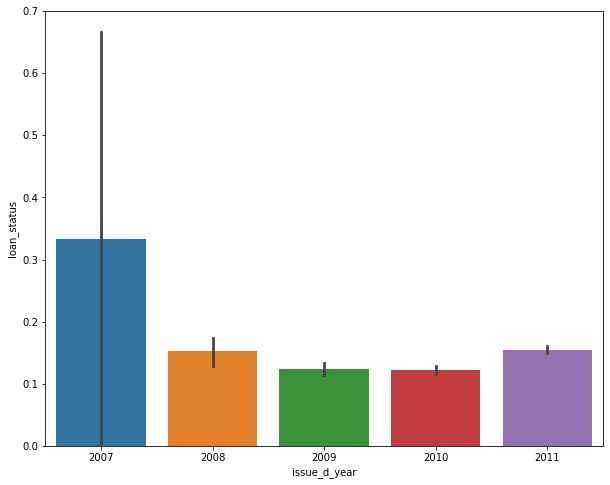

In [72]:
#Calling the function by passing the parameter "issue_d_year"
plt.figure(figsize=(10,8))
barplot_func('issue_d_year')

<b>Plot#5: Conclusion</b>

The default ratio was highest in 2007, but then it was gradually decreasing till 2010 but in 2011 we see again a spike. However, this plot is not giving us much insight if this year default rate will be more or less than previous year.

<b>Plot#6: "Ownership of home" against loan_status</b>

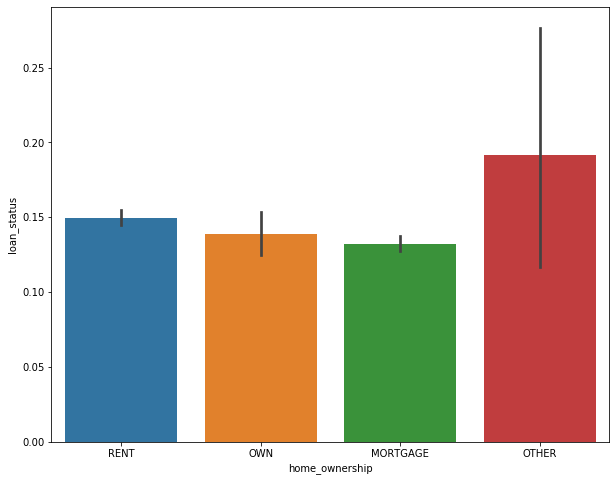

In [73]:
#Calling the function by passing the parameter "home_ownership"
plt.figure(figsize=(10,8))
barplot_func('home_ownership')

<b>Plot#6: Conclusion</b>

Applicants who belong to "Other" category hsa highest default rate. This is not very conclusive since there is no definition of this "Other" category. Another observation is applicants who rent their homes are likely to default more than applicants who owns their homes or whose homes are under mortgage

<b>Plot#7: "Amount of the loan" against loan_status</b>

Since loan amount is widespread, from 500 to 35000 and this is a continuous variable, we can create buckets of it and then analyse the variable. This concept is called binning.

In [74]:
loan_master['loan_amnt_original'] = loan_master['loan_amnt']

In [75]:
#creating loan amount bins
def loanamt_bin(amount):
    if amount < 6000:
        return 'Low'
    elif amount >=6000 and amount < 18000:
        return 'Medium'
    elif amount >= 18000 and amount < 30000:
        return 'High'
    else:
        return 'Very High'
        
loan_master['loan_amnt'] = loan_master['loan_amnt'].apply(lambda x: loanamt_bin(x))


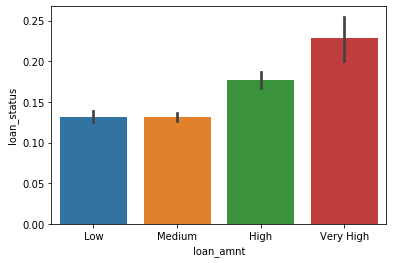

In [76]:
#Calling the function by passing the parameter "loan_amnt"
barplot_func('loan_amnt') 

<b>Plot#7: Conclusion</b>

From the above graph, it is concluded that default rate increases with the increase in loan amount

<b>Plot#8: "Loan grade" against loan_status</b>

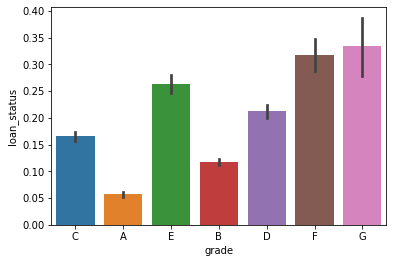

In [77]:
# compare default rates across grade of loan
barplot_func('grade')

<b>Plot#8: Conclusion</b>

From the above graph we can see that there is a trend of default ratio increasing as the grade alphabetically increases

<b>Plot#9: Sub Grade" against loan_status</b>

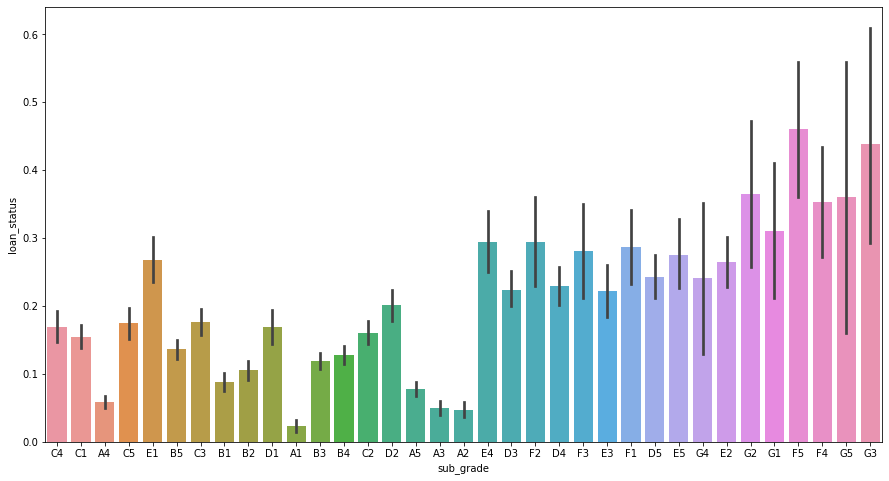

In [78]:
#Calling the function by passing the parameter "sub_grade"
plt.figure(figsize=(15,8))
barplot_func('sub_grade')

<b>Plot#9: Conclusion</b>

Sub_grade plot's trend is similar to the grade plot, the loan default ratio increases with the sub_grade category

<b>Plot#10: "Annual income" against loan_status</b>

Binning annual income similar to laon amount

In [79]:
loan_master['annual_inc_original'] = loan_master['annual_inc']

In [80]:
# annual income
def tot_ann_inc(income):
    if income <= 50000:
        return 'Low'
    elif income > 50000 and income <=100000:
        return 'Medium'
    elif income > 100000 and income <=150000:
        return 'High'
    else:
        return 'Very High'

loan_master['annual_inc'] = loan_master['annual_inc'].apply(lambda x: tot_ann_inc(x))

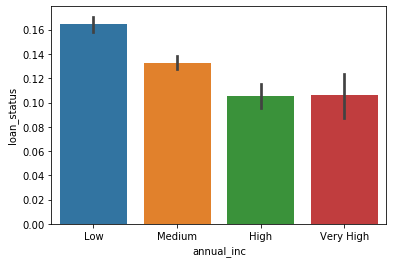

In [81]:
#Calling the function by passing the parameter "annual_inc"
barplot_func('annual_inc') 

<b>Plot#10: Conclusion</b>

From the above graph it is clear that applicants whose income is below 5000 are more likely to default the loan than applicants with higher income. In fact, the default ratio is inversely proportional to the income of the applicant.

<b>Plot#11: "Loan Interest" against loan_status</b>

Binning Loan Interest

In [82]:
#First changing the int_rate column to float
loan_master['int_rate'] = loan_master['int_rate'].astype(float)

In [83]:
loan_master['int_rate_original'] = loan_master['int_rate']

In [84]:
def loan_int(intrate):
    if intrate <= 10:
        return 'Low'
    elif intrate > 10 and intrate <=15:
        return 'Medium'
    elif intrate > 15 and intrate <=20:
        return 'High'
    else:
        return 'Very High'
    
loan_master['int_rate'] = loan_master['int_rate'].apply(lambda x: loan_int(x))

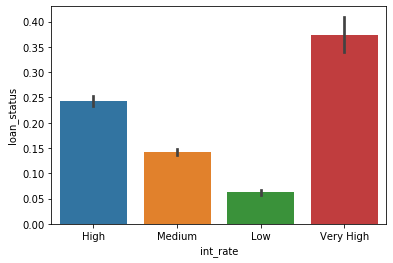

In [85]:
#Calling the function by passing the parameter "int_rate"
barplot_func('int_rate')

<b>Plot#11: Conclusion</b>

We can clearly conclude from the above plot that more the interest rate, more likely the loan is to default

<b>Plot#12: "Installment" against loan_status</b>

In [86]:
#Binning installment
# installment
def loan_installment(inst):
    if inst <= 200:
        return 'Low'
    elif inst > 200 and inst <=400:
        return 'Medium'
    elif inst > 400 and inst <=600:
        return 'High'
    else:
        return 'Very High'
    
loan_master['installment'] = loan_master['installment'].apply(lambda x: loan_installment(x))

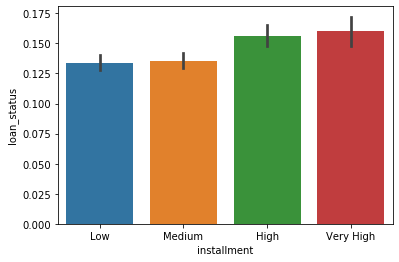

In [87]:
#Calling the function by passing the parameter "installment"
barplot_func('installment') 

<b>Plot#12: Conclusion</b>

From the above graph it is clear that with increasing installment, probability of the loan getting default increases

## Segmented Univariate Analysis

Now, we have seen a few univariate analysis plots. Let's now create some segments and try to find some patterns.

In [88]:
#Similar to univariate analysus lets us create a function for segmented plot that we can re-use
def segmentplot_func(var, huevar):
    plt.figure(figsize=(15, 8))
    sns.barplot(x=var, y='loan_status', hue=huevar, data=loan_master)
    plt.show()

<b>Plot#13: "Term" against loan_status segmented by purpose</b>

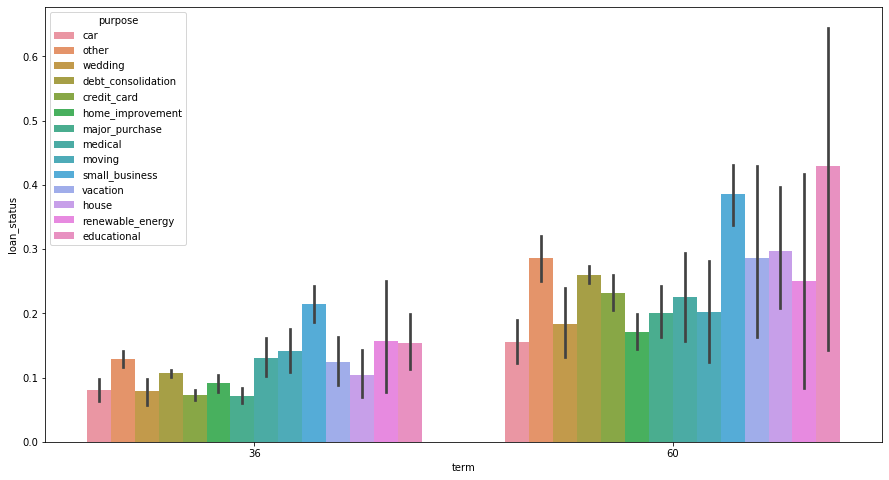

In [89]:
segmentplot_func("term", "purpose")

<b>Plot#13: Conclusion</b>

We can see from the above plot that for 36months term loan maximum default happens if the loan was taken for "small business", while for 60months term loan default happens whem loan is taken for education

<b>Plot#14: "Installment" against loan_status segmented by grade</b>

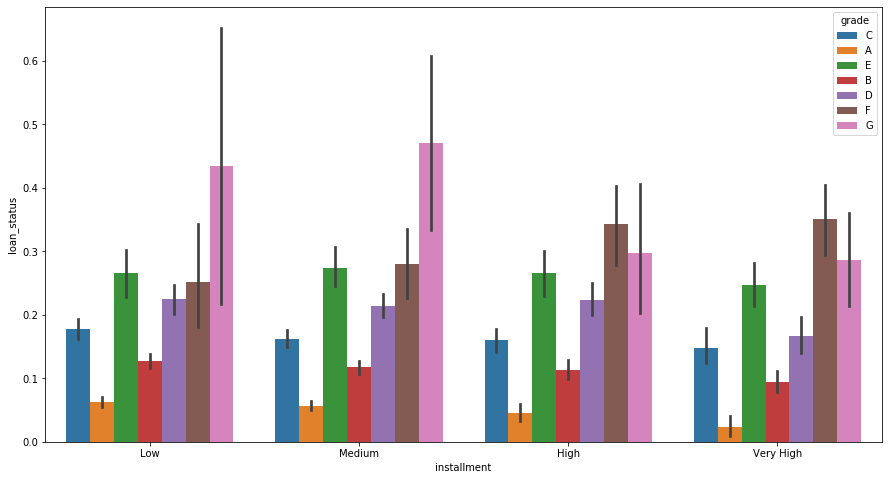

In [90]:
segmentplot_func("installment", "grade")

<b>Plot#14: Conclusion</b>

From the above graph we can conclude that when installment amount is in the low and medium range, maximum default happens in grade 'G' type of loan. For installment in the higher ranges, maximum default happens in grade 'F'

<b>Plot#15: "Issue Year" against loan_status segmented by home ownership</b>

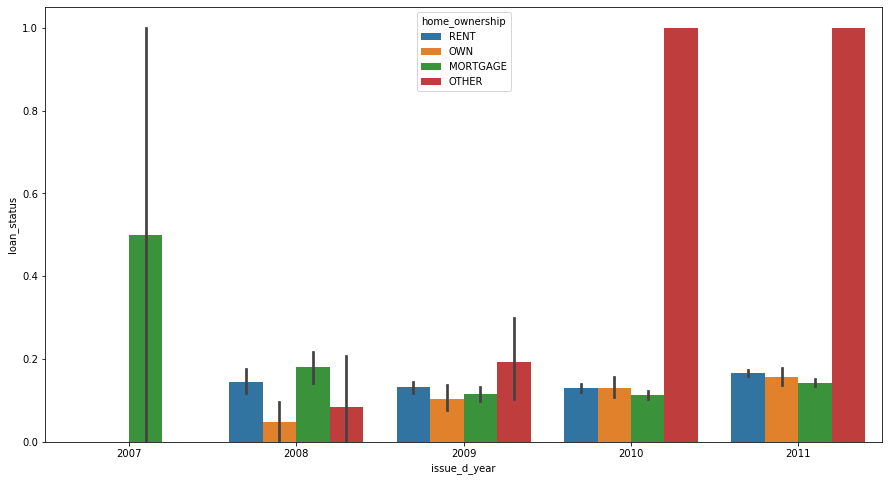

In [91]:
segmentplot_func("issue_d_year", "home_ownership")

<b>Plot#15: Conclusion</b>

From the above graph we can see that most of that most of the defaulters om 2010 and 2011 are not home owners. So, applicants owing or renting or who are having a mortgage on a home tend not to default over the past few years.

<b>Plot#16: "Annual Income" against loan_status segmented by length of employment</b>

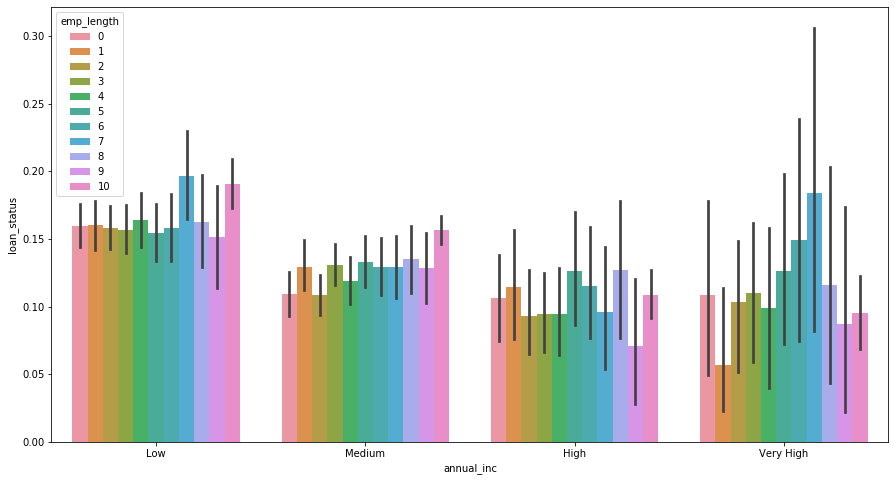

In [92]:
segmentplot_func("annual_inc", "emp_length")

<b>Plot#16: Conclusion</b>

From the above graph we can conclude that applicants having 7 to 10 years of experience in the low income group tend to default more while applicants having the same number of years of experience in the high or very high income group default much less. We cannot conclude about applicants with other number of years of experience as the graphs show a steady pattern.

## Bivariate Analysis

In [93]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [94]:
loan_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35436 entries, 0 to 35435
Data columns (total 29 columns):
loan_status                35436 non-null int64
loan_amnt                  35436 non-null object
term                       35436 non-null int64
int_rate                   35436 non-null object
installment                35436 non-null object
grade                      35436 non-null object
sub_grade                  35436 non-null object
emp_title                  35436 non-null object
emp_length                 35436 non-null int64
home_ownership             35436 non-null object
annual_inc                 35436 non-null object
verification_status        35436 non-null object
purpose                    35436 non-null object
addr_state                 35436 non-null object
dti                        35436 non-null float64
inq_last_6mths             35436 non-null int64
open_acc                   35436 non-null int64
pub_rec                    35436 non-null int64
revol_util    

<b>Plot#17: Heatmap showing correlation of the most important variables</b>

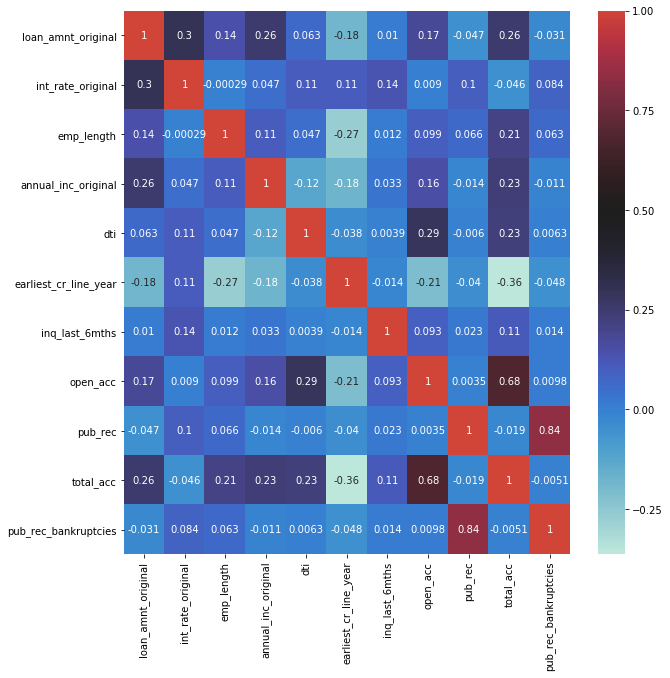

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
cont_var= ['loan_amnt_original', 'int_rate_original', 'installment',
       'emp_length', 'annual_inc_original',
       'dti',  'earliest_cr_line_year',
       'inq_last_6mths', 'open_acc', 'pub_rec',  'revol_util',
       'total_acc', 
       'pub_rec_bankruptcies']

corr = loan_master[cont_var].corr()

sns.heatmap(corr, annot=True, center=0.5)

<b>Plot#18: Loan Amount vs Time</b>

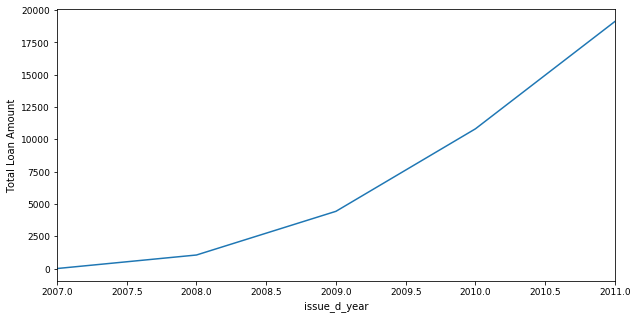

In [109]:
plt.figure(figsize=(10,5))
loan_master.groupby('issue_d_year').loan_amnt.count().plot(kind='line', fontsize=9)
plt.ylabel('Total Loan Amount')
plt.show()

<b>Plot#19: Avg loan Amount vs time </b>

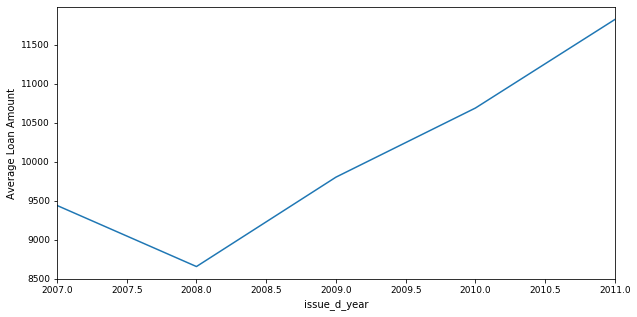

In [111]:
plt.figure(figsize=(10,5))
loan_master.groupby('issue_d_year').loan_amnt_original.mean().plot(kind='line', fontsize=9)
plt.ylabel('Average Loan Amount')
plt.show()

Observation - Avg loan amount dropped sharply around 2008 during the mortgage crisis

<b>Plot#20: Loan amnt vs Annual Income </b>

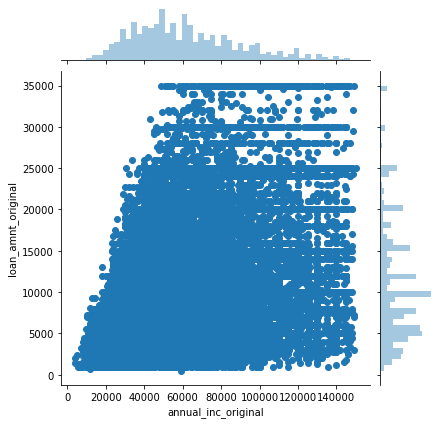

In [98]:
sns.jointplot('annual_inc_original', 'loan_amnt_original', loan_master.loc[loan_master['annual_inc_original']<150000])
plt.show()

Observation - The riskier loan would be the one who are talking major loans with minimun income like there are people with income around 50000 taking loans of 35000, which wuld be very high risk

<b>Plot#21: Loan Amount vs Verification Status vs loan status </b>

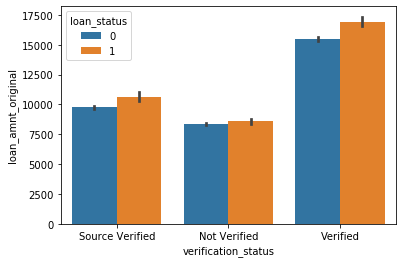

In [99]:
sns.barplot(x='verification_status', y='loan_amnt_original', hue="loan_status", data=loan_master, estimator=np.mean)

<b>Plot#22:Loan Term vs Int rate </b>

In [100]:
loan_master.term = loan_master.term.astype(float)
loan_master.int_rate_original = loan_master.int_rate_original.astype(float)

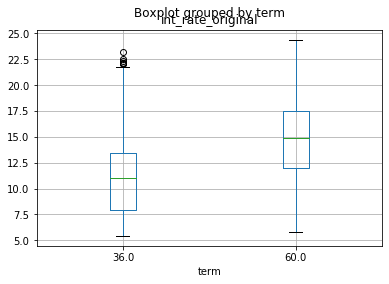

In [101]:
loan_master.boxplot(column='int_rate_original', by='term')
plt.show()

### Loan Term vs Loam Amount Mean

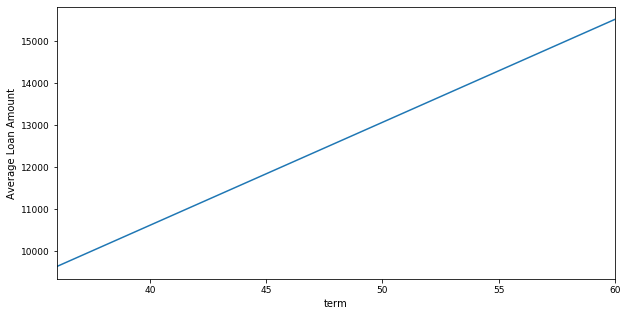

In [112]:
plt.figure(figsize=(10,5))
loan_master.groupby('term').loan_amnt_original.mean().plot(kind='line', fontsize=9)
plt.ylabel('Average Loan Amount')
plt.show()

<b>Plot#23: Conclusion</b>

From the above its evident that as the loan amount increases the term people takes to pay also increases.
Also for the term, The higher the term the more the interest rate 

<b>Plot#24: Interest rate vs grade </b>

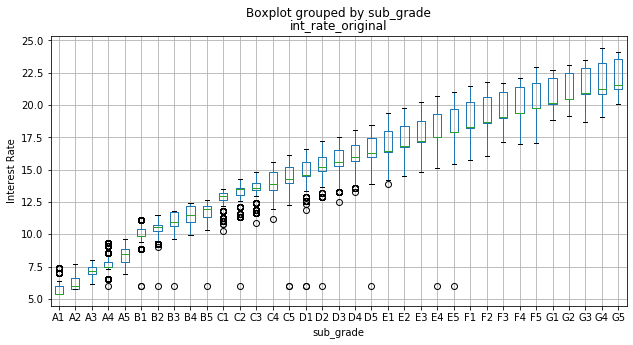

In [113]:
loan_master.boxplot(column='int_rate_original', by='sub_grade',figsize=(10,5))
plt.ylabel('Interest Rate')
plt.show()

<b>Plot#24: Conclusion</b>

The interest rate increases steadily as the grade decreases

<b>Plot#25: Interest vs loan status </b>

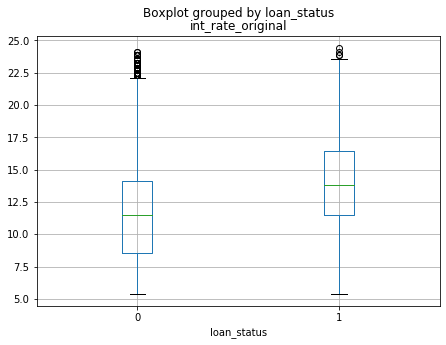

In [104]:
loan_master.boxplot(column='int_rate_original', by='loan_status',figsize=(7,5))

<b>Plot#25: Conclusion</b>

The higher the interest rate the higher the risk of the loan getting charges off.

<b>Plot#26: loan amount vs grade grouped by loan status</b>

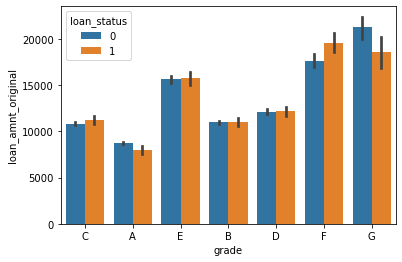

In [115]:
sns.barplot(x='grade', y='loan_amnt_original', hue="loan_status", data=loan_master, estimator=np.mean)
plt.show()

<b>Plot#26: Conclusion</b>

Higher loan amount has lower gradesfor longer terms

<b>Plot#27: Loan amount vs term grouped by loan status: charged off or fully pai</b>

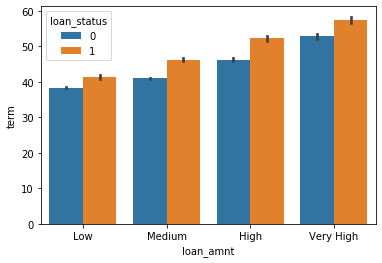

In [114]:
sns.barplot(y='term', x='loan_amnt', hue="loan_status", data=loan_master, estimator=np.mean)
plt.show()

<b>Plot#27: Conclusion</b>

Higher loan amounts with higher terms tend to get more charged off than lower term and lower amounts